In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
Train_CSV = 'C:/Users/DELL/Desktop/sign_mnist_train/sign_mnist_train.csv'
Train_S = pd.read_csv(Train_CSV)
Test_CSV = 'C:/Users/DELL/Desktop/sign_mnist_test/sign_mnist_test.csv'
Test_S = pd.read_csv(Test_CSV)

In [3]:
Train_S.shape

(27455, 785)

In [4]:
Test_S.shape

(7172, 785)

Data Distribution:79.29%(Train)&20.71%(Test)

In [5]:
Train_S.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [6]:
Test_S.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [7]:
label_val = Test_S['label']

In [8]:
y_train=Train_S['label']
y_test=Test_S['label']
X_train=Train_S.drop(columns='label',axis=1)
X_test=Test_S.drop(columns='label',axis=1)

In [9]:
X_train.shape

(27455, 784)

In [10]:
y_train

0         3
1         6
2         2
3         2
4        13
         ..
27450    13
27451    23
27452    18
27453    17
27454    23
Name: label, Length: 27455, dtype: int64

Normalizing the data for increased accuracy

In [11]:
X_train=X_train.values /255
X_test=X_test.values /255 

In [12]:
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

In [13]:
X_train.shape

(27455, 28, 28, 1)

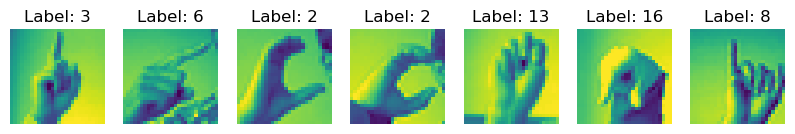

In [14]:
num_images_to_show = 7

plt.figure(figsize=(10, 5))
for i in range(num_images_to_show):
    plt.subplot(1, num_images_to_show, i + 1)
    plt.imshow(X_train[i].reshape(28,28)) 
    plt.axis('off')
    plt.title(f"Label: {y_train[i]}")
    
plt.show()

In [15]:
from sklearn.preprocessing import LabelBinarizer
LB = LabelBinarizer()
y_train = LB.fit_transform(y_train)
y_test = LB.fit_transform(y_test)

Data Augmentation:

In [16]:
from keras.preprocessing.image import ImageDataGenerator

In [17]:
datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False, 
        featurewise_std_normalization=False, 
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range = 10, 
        zoom_range = 0.1,
        width_shift_range=0.1, 
        height_shift_range=0.1,  
        horizontal_flip =False,  
        vertical_flip=False) 


datagen.fit(X_train)

In [18]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization,Concatenate
from keras.callbacks import ReduceLROnPlateau

In [19]:
mcpsave = tf.keras.callbacks.ModelCheckpoint('C:/Users/DELL/Desktop/cnn_model.h5',
                                            save_best_only=True, monitor='val_loss', mode='min')

reduce_lr_loss = ReduceLROnPlateau(monitor='val_accuracy', patience = 3, verbose=1,factor=0.5, min_lr=0.00001)

mcpsave1 = tf.keras.callbacks.ModelCheckpoint('C:/Users/DELL/Desktop/cnn_model1.h5',
                                              save_best_only=True, monitor='val_loss', mode='min')

mcpsave2 = tf.keras.callbacks.ModelCheckpoint('C:/Users/DELL/Desktop/cnn_model2.h5',
                                              save_best_only=True, monitor='val_loss', mode='min')

CNN model

In [20]:
model = Sequential()

model.add(Conv2D(75 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (28,28,1)))

model.add(BatchNormalization())

model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(50 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))

model.add(Dropout(0.2))

model.add(BatchNormalization())

model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(25 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))

model.add(BatchNormalization())

model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Flatten())

model.add(Dense(units = 512 , activation = 'relu'))

model.add(Dropout(0.3))

model.add(Dense(units = 24 , activation = 'softmax'))

model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()








Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 75)        750       
                                                                 
 batch_normalization (Batch  (None, 28, 28, 75)        300       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 75)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 50)        33800     
                                                                 
 dropout (Dropout)           (None, 14, 14, 50)        0         
                                                                 
 batch_normalization_1 (Bat  (None, 14, 14, 50)        2

In [21]:


conclusion = model.fit(datagen.flow(X_train, y_train, batch_size=128), 
                    epochs=15, 
                    validation_data=(X_test, y_test), 
                    callbacks=[reduce_lr_loss, mcpsave]) 

Epoch 1/15
215/215 [==============================] - 47s 211ms/step - loss: 0.9956 - accuracy: 0.6853 - val_loss: 3.2228 - val_accuracy: 0.1891 - lr: 0.0010
Epoch 2/15


C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


215/215 [==============================] - 50s 234ms/step - loss: 0.2003 - accuracy: 0.9351 - val_loss: 2.1447 - val_accuracy: 0.4310 - lr: 0.0010
Epoch 3/15
215/215 [==============================] - 50s 233ms/step - loss: 0.0984 - accuracy: 0.9689 - val_loss: 1.3751 - val_accuracy: 0.6346 - lr: 0.0010
Epoch 4/15
215/215 [==============================] - 50s 234ms/step - loss: 0.0674 - accuracy: 0.9789 - val_loss: 0.0548 - val_accuracy: 0.9795 - lr: 0.0010
Epoch 5/15
215/215 [==============================] - 51s 237ms/step - loss: 0.0459 - accuracy: 0.9850 - val_loss: 0.0451 - val_accuracy: 0.9876 - lr: 0.0010
Epoch 6/15
215/215 [==============================] - 51s 235ms/step - loss: 0.0347 - accuracy: 0.9889 - val_loss: 0.0137 - val_accuracy: 0.9975 - lr: 0.0010
Epoch 7/15
215/215 [==============================] - 51s 236ms/step - loss: 0.0272 - accuracy: 0.9912 - val_loss: 0.0467 - val_accuracy: 0.9816 - lr: 0.0010
Epoch 8/15
215/215 [==============================] - 51s 235ms

In [22]:
 from tensorflow.keras.layers import LeakyReLU

model1 = Sequential()
model1.add(Conv2D(75, (3, 3), strides=1, padding='same', input_shape=(28, 28, 1)))
model1.add(LeakyReLU(alpha=0.01))
model1.add(BatchNormalization())
model1.add(MaxPool2D((2, 2), strides=2, padding='same'))
model1.add(Conv2D(50, (3, 3), strides=1, padding='same'))
model1.add(LeakyReLU(alpha=0.01))
model1.add(Dropout(0.5))
model1.add(BatchNormalization())
model1.add(MaxPool2D((2, 2), strides=2, padding='same'))
model1.add(Conv2D(25, (3, 3), strides=1, padding='same'))
model1.add(LeakyReLU(alpha=0.01))
model1.add(BatchNormalization())
model1.add(MaxPool2D((2, 2), strides=2, padding='same'))
model1.add(Flatten())
model1.add(Dense(units=512))
model1.add(LeakyReLU(alpha=0.01))
model1.add(Dropout(0.4))
model1.add(Dense(units=24, activation='softmax'))

model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model1.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 75)        750       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 28, 28, 75)        0         
                                                                 
 batch_normalization_3 (Bat  (None, 28, 28, 75)        300       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 75)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 50)        33800     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 50)       

In [23]:
conclusion1 = model1.fit(datagen.flow(X_train, y_train, batch_size=128), 
                    epochs=17, 
                    validation_data=(X_test, y_test), 
                    callbacks=[reduce_lr_loss, mcpsave1]) 

Epoch 1/17
215/215 [==============================] - 53s 237ms/step - loss: 1.3502 - accuracy: 0.5775 - val_loss: 4.3721 - val_accuracy: 0.0520 - lr: 0.0010
Epoch 2/17
215/215 [==============================] - 53s 247ms/step - loss: 0.3536 - accuracy: 0.8795 - val_loss: 3.0509 - val_accuracy: 0.3288 - lr: 0.0010
Epoch 3/17
215/215 [==============================] - 53s 248ms/step - loss: 0.1908 - accuracy: 0.9350 - val_loss: 0.2933 - val_accuracy: 0.9027 - lr: 0.0010
Epoch 4/17
215/215 [==============================] - 53s 244ms/step - loss: 0.1220 - accuracy: 0.9598 - val_loss: 0.8836 - val_accuracy: 0.7394 - lr: 0.0010
Epoch 5/17
215/215 [==============================] - 53s 246ms/step - loss: 0.0967 - accuracy: 0.9673 - val_loss: 0.0344 - val_accuracy: 0.9947 - lr: 0.0010
Epoch 6/17
215/215 [==============================] - 53s 247ms/step - loss: 0.0728 - accuracy: 0.9763 - val_loss: 0.2358 - val_accuracy: 0.9073 - lr: 0.0010
Epoch 7/17
215/215 [==============================] 

In [24]:
model2 = Sequential()
model2.add(Conv2D(75 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (28,28,1)))
model2.add(BatchNormalization())
model2.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model2.add(Conv2D(50 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model2.add(Dropout(0.2))
model2.add(BatchNormalization())
model2.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model2.add(Conv2D(25 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model2.add(BatchNormalization())
model2.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model2.add(Flatten())
model2.add(Dense(units = 512 , activation = 'relu'))
model2.add(Dropout(0.3))
model2.add(Dense(units = 24 , activation = 'softmax'))
model2.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])
model2.summary()
y_train_int = np.argmax(y_train, axis=1)
y_test_int = np.argmax(y_test, axis=1)

conclusion2 = model2.fit(datagen.flow(X_train, y_train_int, batch_size=128), 
                         epochs=17, 
                         validation_data=(X_test, y_test_int), 
                         callbacks=[reduce_lr_loss, mcpsave2])


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 75)        750       
                                                                 
 batch_normalization_6 (Bat  (None, 28, 28, 75)        300       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 14, 14, 75)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 50)        33800     
                                                                 
 dropout_4 (Dropout)         (None, 14, 14, 50)        0         
                                                                 
 batch_normalization_7 (Bat  (None, 14, 14, 50)       

In [25]:
print("Accuracy =  " , model.evaluate(X_test,y_test)[1]*100 , "%")

225/225 [==============================] - 3s 12ms/step - loss: 0.0067 - accuracy: 0.9972
Accuracy =   99.72113966941833 %


In [26]:
print("Accuracy =  " , model1.evaluate(X_test,y_test)[1]*100 , "%")

225/225 [==============================] - 3s 13ms/step - loss: 0.0182 - accuracy: 0.9944
Accuracy =   99.44227337837219 %


In [27]:
y_test_int = np.argmax(y_test, axis=1)
accuracy = model2.evaluate(X_test, y_test_int)[1] * 100
print("Accuracy = ", accuracy, "%")
 

225/225 [==============================] - 3s 13ms/step - loss: 0.0011 - accuracy: 1.0000
Accuracy =  100.0 %


Model 3 is most accurate in comparison

In [28]:
pred = np.argmax(model.predict(X_test),axis=1)
pred[:10] 

pred = np.argmax(model.predict(X_test),axis=1)
for i in range(len(pred)):
    if(pred[i] >= 9):
        pred[i] += 1
pred[:5] 

225/225 [==============================] - 3s 12ms/step


array([ 6,  5, 10,  0,  3], dtype=int64)

In [29]:
pred1 = np.argmax(model1.predict(X_test),axis=1)
pred1[:10] 

pred1 = np.argmax(model1.predict(X_test),axis=1)
for i in range(len(pred1)):
    if(pred1[i] >= 9):
        pred1[i] += 1
pred1[:5]

225/225 [==============================] - 3s 13ms/step


array([ 6,  5, 10,  0,  3], dtype=int64)

In [30]:
pred2 = np.argmax(model2.predict(X_test),axis=1)
pred2[:10] 

pred2 = np.argmax(model2.predict(X_test),axis=1)
for i in range(len(pred2)):
    if(pred2[i] >= 9):
        pred2[i] += 1
pred2[:5]

225/225 [==============================] - 3s 12ms/step


array([ 6,  5, 10,  0,  3], dtype=int64)

In [31]:
print(np.argmax(y_test[0]))
print(np.argmax(y_test[1]))

label_val[:10]


6
5


0     6
1     5
2    10
3     0
4     3
5    21
6    10
7    14
8     3
9     7
Name: label, dtype: int64

In [32]:
y_test[:10]

array([[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0]])

Confusion Matrix:

<Axes: >

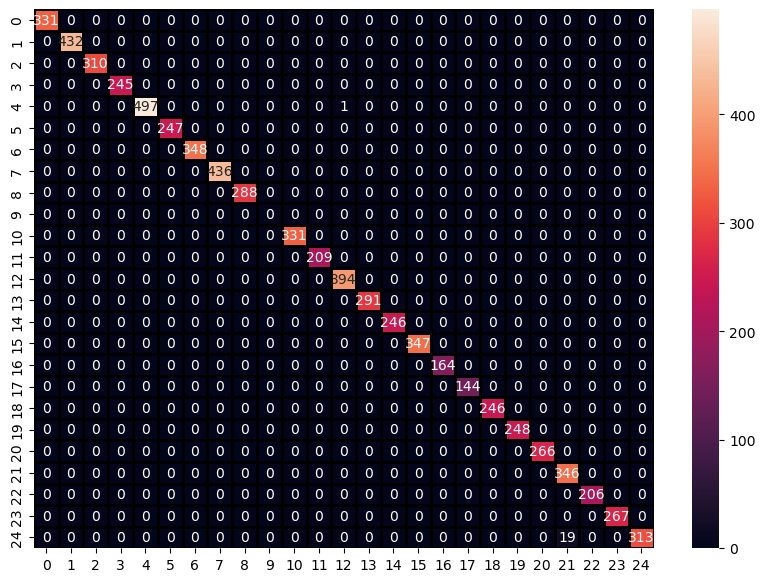

In [33]:
cm = tf.math.confusion_matrix(labels=label_val, predictions=pred)


num_classes = 25
index_columns = [i for i in range(num_classes)]

cm_df = pd.DataFrame(cm, index=index_columns, columns=index_columns)

plt.figure(figsize=(10, 7))
sns.heatmap(cm_df, linecolor='black', linewidth=1, annot=True, fmt='d')


<Axes: >

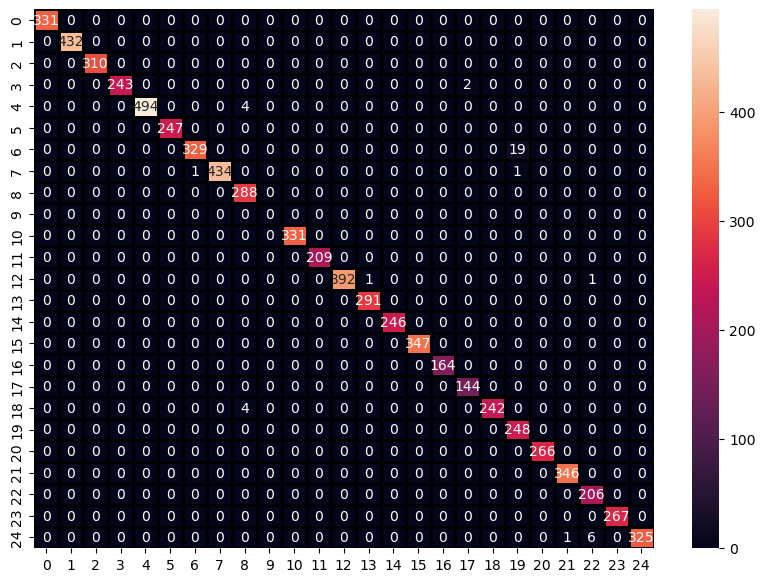

In [34]:
cm1 = tf.math.confusion_matrix(labels=label_val, predictions=pred1)


num_classes = 25
index_columns = [i for i in range(num_classes)]

cm_df = pd.DataFrame(cm1, index=index_columns, columns=index_columns)

plt.figure(figsize=(10, 7))
sns.heatmap(cm_df, linecolor='black', linewidth=1, annot=True, fmt='d')


<Axes: >

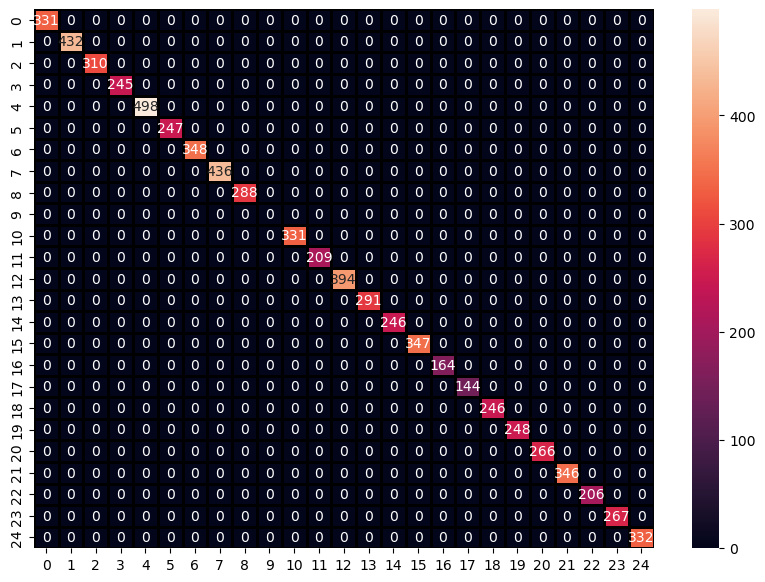

In [35]:
cm2 = tf.math.confusion_matrix(labels=label_val, predictions=pred2)


num_classes = 25
index_columns = [i for i in range(num_classes)]

cm_df = pd.DataFrame(cm2, index=index_columns, columns=index_columns)

plt.figure(figsize=(10, 7))
sns.heatmap(cm_df, linecolor='black', linewidth=1, annot=True, fmt='d')


In [36]:
cr_pred = np.nonzero(pred2 == np.array(label_val))[0]

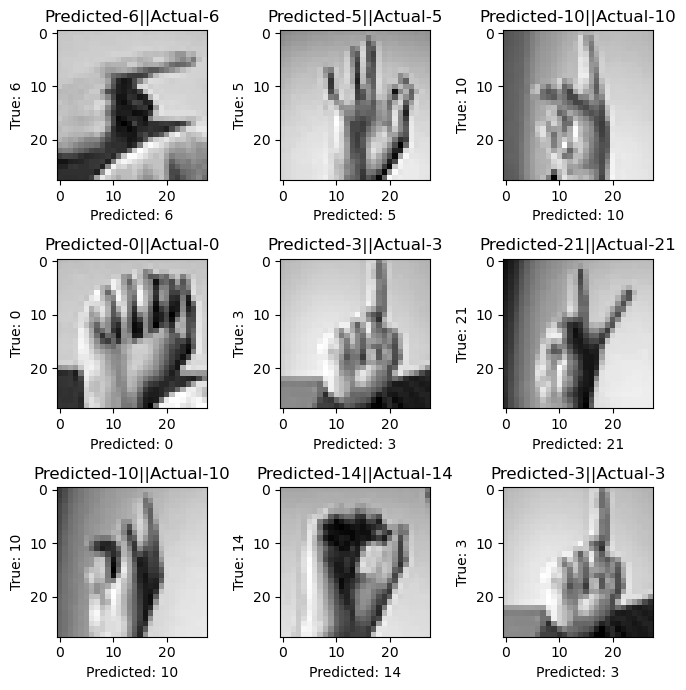

In [38]:
i = 0
plt.figure(figsize=(7,7))
for c in cr_pred[:9]:
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[c].reshape(28,28), cmap="gray", interpolation='none')
    plt.ylabel(f"True: {label_val[c]}")
    plt.xlabel(f"Predicted: {pred1[c]}")
    plt.title("Predicted-{}||Actual-{}".format(pred2[c], label_val[c]))
    plt.tight_layout()
    i += 1

In [53]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import cv2
import mediapipe as mp
from keras.models import load_model
from keras.preprocessing import image
import time

In [54]:
model = load_model('C:/Users/DELL/Desktop/cnn_model2.h5')

In [55]:
mphands = mp.solutions.hands
hands = mphands.Hands()
mp_drawing = mp.solutions.drawing_utils

cap = cv2.VideoCapture(0)
_, frame = cap.read()
h, w, c = frame.shape

analysisframe = ''
letterpred = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']



while True:
    _, frame = cap.read()

    k = cv2.waitKey(1)
    if k%256 == 27:
        # ESC pressed
        print("Escape hit, closing...")
        break
    elif k%256 == 32:
        # SPACE pressed
        analysisframe = frame
        showframe = analysisframe
        cv2.imshow("Frame", showframe)
        framergbanalysis = cv2.cvtColor(analysisframe, cv2.COLOR_BGR2RGB)
        resultanalysis = hands.process(framergbanalysis)
        hand_landmarksanalysis = resultanalysis.multi_hand_landmarks
        if hand_landmarksanalysis:
            for handLMsanalysis in hand_landmarksanalysis:
                x_max = 0
                y_max = 0
                x_min = w
                y_min = h
                for lmanalysis in handLMsanalysis.landmark:
                    x, y = int(lmanalysis.x * w), int(lmanalysis.y * h)
                    if x > x_max:
                        x_max = x
                    if x < x_min:
                        x_min = x
                    if y > y_max:
                        y_max = y
                    if y < y_min:
                        y_min = y
                y_min -= 20
                y_max += 20
                x_min -= 20
                x_max += 20

            analysisframe = cv2.cvtColor(analysisframe, cv2.COLOR_BGR2GRAY)
            analysisframe = analysisframe[y_min:y_max, x_min:x_max]
            analysisframe = cv2.resize(analysisframe, (28, 28))

            nlist = []
            rows, cols = analysisframe.shape
            for i in range(rows):
                for j in range(cols):
                    k = analysisframe[i, j]
                    nlist.append(k)

            datan = pd.DataFrame(nlist).T
            colname = []
            for val in range(784):
                colname.append(val)
            datan.columns = colname

            pixeldata = datan.values
            pixeldata = pixeldata / 255
            pixeldata = pixeldata.reshape(-1, 28, 28, 1)

            predictions1 = model.predict(pixeldata) 
            predarray = np.array(predictions1[0])
            letter_prediction_dict = {Pred[i]: predarray[i] for i in range(len(Pred))}
            predarrayordered = sorted(predarray, reverse=True)
            high1 = predarrayordered[0]
            high2 = predarrayordered[1]
            high3 = predarrayordered[2]
            for key, value in letter_prediction_dict.items():
                if value == high1:
                    print("Predicted Character 1: ", key)
                    print('Confidence 1: ', 100 * value)
                elif value == high2:
                    print("Predicted Character 2: ", key)
                    print('Confidence 2: ', 100 * value)
                elif value == high3:
                    print("Predicted Character 3: ", key)
                    print('Confidence 3: ', 100 * value)
            time.sleep(5)


cap.release()
cv2.destroyAllWindows()


KeyboardInterrupt: 

In [56]:
cap.release()
cv2.destroyAllWindows()

In [50]:
cap = cv2.VideoCapture(0)

In [51]:
_, frame = cap.read()
h, w, c = frame.shape